# Binary XGBoost best and worst performance

Evaluates the two binary XGBoost models that have the best and worst classification performance. This is KIRC (Kidney renal clear cell carcinoma) and ESCA (Esophageal carcinoma) (if you want figures of different cancer types, just change cancer_types). Generates confusion matrices, ROC curves and precision-recall curves.

Generates the files (in figure_folder): confusion_matrix_xgboost_*cancer*.svg, precision_recall_curve_xgboost_*cancer*.svg, roc_curve_xgboost_*cancer*.svg and metrics_xgboost_*cancer*.csv

In [14]:
best_and_worst_cancer_types = ['KIRC', 'ESCA']
cancer_types = ['BLCA', 'BRCA', 'COAD', 'ESCA', 'HNSC', 'KIRC', 'KIRP', 'LIHC', 'LUAD', 'LUSC', 'PRAD', 'THCA', 'UCEC']

figure_folder = 'binary_xgboost_figs/'

Add the Evaluate module to path and make figure folder:

In [15]:
# adding this path so we can import Evaluate
import sys
import os

cwd = os.getcwd() # get the current path, and only take up to methylation-patterns-izzy (discarding the end bit)
file = 'methylation-patterns-izzy'
end = cwd.find(file) + len(file) + 1 # find start of file in path, add on its lenth to go to the end, and add on 1 to get the /
path = cwd[0:end]
print("path is ", path)
sys.path.append(path)

from Evaluate import load_and_eval
root_path = path

if not (figure_folder.strip('/') in os.listdir()):
    os.mkdir(figure_folder)

path is  /Tank/methylation-patterns-code/methylation-patterns-izzy/


Use the load and eval function for each cancer type:

Getting values and diagnoses from: 
/Tank/methylation-patterns-code/methylation-patterns-izzy/data_preprocessing/dataset/pandas/m_values/TCGA-KIRC.csv
/Tank/methylation-patterns-code/methylation-patterns-izzy/data_preprocessing/dataset/pandas/diagnoses/TCGA-KIRC.csv
m_value and diagnoses shapes:
(278222, 485)
(485,)
num classes is:  2
[0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 0]
[0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 0]
Acc, conf mat:
1.0
[[40  0]
 [ 0 82]]
precision, recall, f1 for each class:
[1. 1.] [1. 1.] [1. 1.]
matthews correlation coeficient
1.0
roc_auc for each class:  [1. 

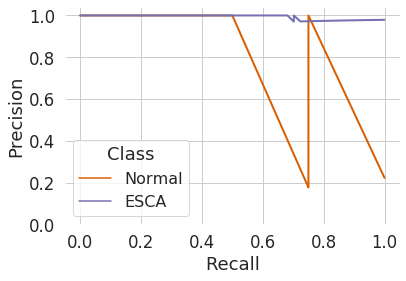

In [13]:
for best_and_worst_cancer_type in best_and_worst_cancer_types:
    load_and_eval('../xgboost/saved_models/xgboost_model_'+best_and_worst_cancer_type + '.pkl', '../xgboost/test_data_indices_XGBoost_'+best_and_worst_cancer_type, 'xgboost_'+best_and_worst_cancer_type, cancer_code=best_and_worst_cancer_type, use_small=False, remove_inf = True, folder_name=figure_folder)

Testing and trying to make the figures nicer:

In [1]:
# reloading the package:
# import importlib
# import Evaluate
# importlib.reload(Evaluate)

# conf_mat = [[40, 0], [0, 82]]

# Evaluate.plot_confusion_matrix(conf_mat, 'test', save_path = figure_folder + 'test.svg', cancer_type = 'KIRC')


# diagnoses = [0, 1, 1, 1, 0]
# import numpy as np
# probs = np.array([[0.2, 0.8], [0.6, 0.4], [0.65, 0.35], [0.5, 0.5], [0.7, 0.3]])
# Evaluate.plot_curve('precision_recall', diagnoses, probs, 2, 'test', 'KIRC', save_folder = figure_folder)

## Get ROC and PR AUCs for each cancer_type

In [20]:

auc_0s = []
auc_1s = []
roc_aucs = []

import Evaluate
from Evaluate import get_pr_auc, get_roc_auc
# # for cancer_type in ['ESCA', 'KIRC']:
for cancer_type in cancer_types:
    try: # quickly do a first try without getting data: (for if we already have it stored in metrics)
        auc_0, auc_1 = get_pr_auc(cancer_type, '../xgboost/figs/metrics_xgboost_' + cancer_type + '.csv', model_path = '', Xtest = None, ytest = None)
    except: # otherwise we actually have to get the data
        Xtest, ytest = load_data_from_indices('../xgboost/test_data_indices_XGBoost_'+cancer_type, cancer_type, True)
        auc_0, auc_1 = get_pr_auc(cancer_type, '../xgboost/figs/metrics_xgboost_' + cancer_type + '.csv', model_path = '../xgboost/saved_models/xgboost_model_'+cancer_type + '.pkl', Xtest = Xtest, ytest = ytest)
        
    auc_0s.append(auc_0)
    auc_1s.append(auc_1)
    
    roc_auc = get_roc_auc(cancer_type, '../xgboost/figs/metrics_xgboost_' + cancer_type + '.csv')
    roc_aucs.append(roc_auc)
    
    
    

 Can just quote:  ['0.7873015873015872', '0.9991645745876074']
 Can just quote:  ['0.9965247584541063', '0.9999498737468435']
 Can just quote:  ['1.0', '1.0']
 Can just quote:  ['0.7998366013071896', '0.9926622042488306']
 Can just quote:  ['0.9693117068117069', '0.9997796659962487']
 Can just quote:  ['1.0', '1.0']
 Can just quote:  ['0.9854312354312355', '0.9995917950768796']
 Can just quote:  ['0.9999999999999998', '1.0']
 Can just quote:  ['1.0', '1.0']
 Can just quote:  ['1.0', '1.0']
 Can just quote:  ['0.7661779246394631', '0.9976679033801152']
 Can just quote:  ['0.9462602212602211', '0.9970627622464302']
 Can just quote:  ['1.0', '1.0']


<module 'Evaluate' from '/Tank/methylation-patterns-code/methylation-patterns-izzy/Evaluate.py'>

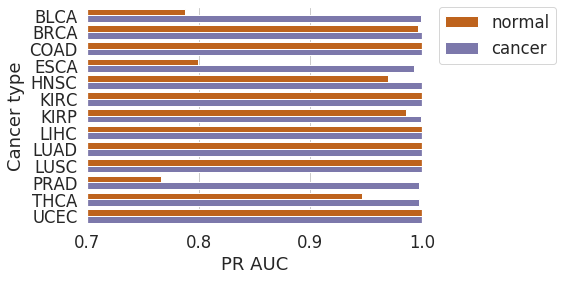

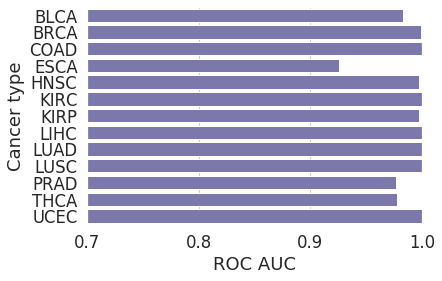

In [22]:
# plot them:
import importlib
import Evaluate
importlib.reload(Evaluate)

from Evaluate import plot_pr_and_roc_auc_bars
plot_pr_and_roc_auc_bars(cancer_types, auc_0s, auc_1s, roc_aucs, 'binary_xgboost_figs/PR_bar_plot_xgboost_binary.svg', 'binary_xgboost_figs/ROC_bar_plot_xgboost_binary.svg')